In [1]:
import sys, os
sys.path.append(os.path.abspath('../..'))
import fridom.ShallowWater as sw

# State Vector and Field Variables

The modular structure of the state vector and the field variables allows for an easy construction of own custom initial conditions and fast analysis of the results. All operations that are performed on a state vector will be performed on all indiviual components of it.

## Constructing a State Vector

In [2]:
# create model settings and grid
mset = sw.ModelSettings()
grid = sw.Grid(mset)

# construction from default constructor
z_zero = sw.State(mset, grid)

# construction from Initial Conditions
z_jet = sw.InitialConditions.Jet(mset, grid)
z_wave = sw.InitialConditions.SingleWave(mset, grid)

# making a copy
z_jet_copy = z_jet.copy()

print("Type of State Vector: ", type(z_zero))

Type of State Vector:  <class 'fridom.ShallowWater.State.State'>


## Accessing the Field Variables

In [3]:
# access fields
u_jet = z_jet.u
v_jet = z_jet.v
h_jet = z_jet.h

print("Type of Field Variable: ", type(u_jet))

Type of Field Variable:  <class 'fridom.Framework.FieldVariable.FieldVariable'>


## Supported operators
Operators work component wise. For example, the sum of two states is the sum of each component (u,v,w,b) at each grid point.

In [4]:
# between states
z_sum  = z_jet + z_wave
z_diff = z_jet - z_wave
z_prod = z_jet * z_wave
z_quot = z_jet / z_wave

# between state and number
z_sum  = z_jet + 1.0
z_diff = z_jet - 1.0
z_prod = z_jet * 1.0
z_quot = z_jet / 1.0

# times equal etc.
z_jet *= 1.0                        # also works for two fields
z_jet /= 1.0                        # also works for two fields
z_jet += 1.0                        # also works for two fields
z_jet -= 1.0                        # also works for two fields

# fourier transform
z_spectral = z_jet.fft()            # fourier transform to spectral
z_physical = z_spectral.fft()       # fourier transform back to physical

# All the above operators can also be applied on the fields:
u_jet *= 1.0 
u_jet_spectral = u_jet.fft()
# ...

# Additionally, array slicing is supported for fields
u_jet[5:10] = 1.0

# Note that this is not supported for states
# the following would raise an error
# z_jet[5:10] = 1.0

## Other useful methods:

In [5]:
# get energy fields
kinetic_energy   = z_jet.ekin()             # is a field variable
potential_energy = z_jet.epot()             # is a field variable
total_energy     = z_jet.etot()             # is a field variable

# get mean energy
print("Mean kinetic Energy  : ", z_jet.mean_ekin())
print("Mean potential Energy: ", z_jet.mean_epot())
print("Mean total Energy    : ", z_jet.mean_etot())

# Get CFL number
print("Maximum CFL number: ", z_jet.max_cfl())

# Get l2 norm
print("L2 norm: ", z_jet.norm_l2())

# get dot product between two states (2nd state is complex conjugated)
z1_dot_z2 = z_jet.dot(z_wave)              # is a field variable

# get norm of difference between two states
print("Norm of difference: ", z_jet.norm_of_diff(z_wave))

Mean kinetic Energy  :  0.001246082760544176
Mean potential Energy:  0.500120146767576
Mean total Energy    :  0.5013662295281203
Maximum CFL number:  0.04353480773358715
L2 norm:  3.284564244146278
Norm of difference:  1.8474199052813458


## New Custom Initial Condition

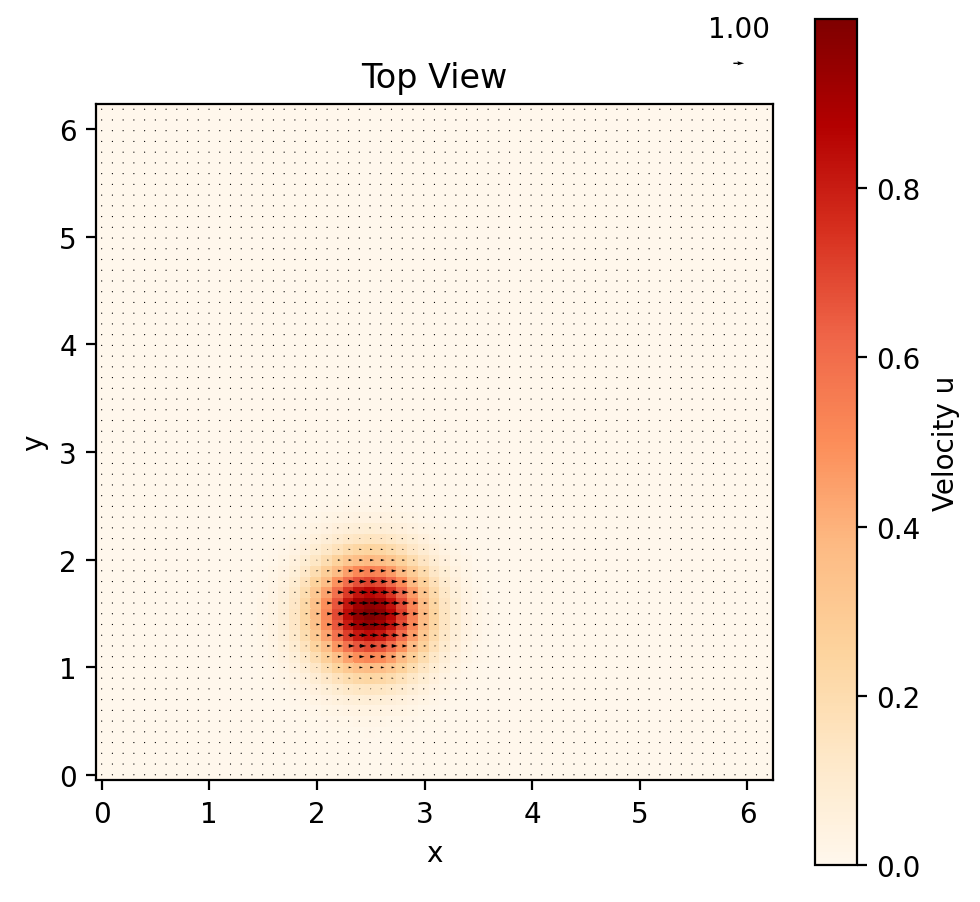

In [6]:
class Gaussian(sw.State):
    """
    Initial condition with a gaussian velocity.
    """
    def __init__(self, mset: sw.ModelSettings, grid: sw.Grid, 
                 x_loc=2.5, y_loc=1.5, radius=0.5) -> None:
        """
        Constructor.

        Args:
            mset (ModelSettings): model settings
            grid (Grid)         : grid
            x_loc (float)       : x location of gaussian. 
            y_loc (float)       : y location of gaussian. 
        """
        super().__init__(mset, grid)

        # get numpy or cupy module
        cp = self.cp                     # is cupy if gpu is enabled

        # get meshgrid
        X, Y = tuple(self.grid.X)

        # set gaussian velocity
        self.u[:] = cp.exp(-((X - x_loc) / radius)**2) * \
                    cp.exp(-((Y - y_loc) / radius)**2)
        return

# create the gaussian state and plot it
z_gauss = Gaussian(mset, grid)
sw.Plot(z_gauss.u)(z_gauss)
